# Projeto de An√°lise de Vendas 


### Introdu√ß√£o

Essa an√°lise apresenta um estudo detalhado dos dados de vendas, buscando identificar tend√™ncias e padr√µes que possam apoiar decis√µes estrat√©gicas. Foram investigados aspectos como a distribui√ß√£o de categorias de produtos, tipos de clientes, tend√™ncias temporais de vendas, desempenho por localidade e a efici√™ncia dos gerentes de conta. Al√©m disso, a an√°lise abrangeu o impacto de descontos, modos de envio e a compara√ß√£o entre pre√ßos de custo e varejo. Os insights obtidos oferecem uma base s√≥lida para otimizar opera√ß√µes e aumentar a lucratividade da empresa.

## Instalando e Carregando os Pacotes

In [1]:
# Vers√£o da Linguagem Python
from platform import python_version
print('Vers√£o da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Vers√£o da Linguagem Python Usada Neste Jupyter Notebook: 3.12.2


In [2]:
# Imports
import pandas as pd                 # Importa a biblioteca pandas e a renomeia como pd
import numpy as np                  # Importa a biblioteca numpy e a renomeia como np
import math                         # Importa o m√≥dulo math para opera√ß√µes matem√°ticas
import sys, os                      # Importa os m√≥dulos sys e os para funcionalidades relacionadas ao sistema operacional
import matplotlib.pyplot as plt     # Importa a biblioteca de visualiza√ß√£o matplotlib e renomeia o m√≥dulo pyplot como plt
import seaborn as sns               # Importa a biblioteca de visualiza√ß√£o seaborn e a renomeia como sns
import warnings                     # Importa o m√≥dulo warnings para gerenciar avisos durante a execu√ß√£o do c√≥digo
import locale                       # Importa o m√≥dulo locale que √© usada para formatar o valor como uma string de moeda
import scipy                                                                # Biblioteca para c√°lculos cient√≠ficos e estat√≠sticos
import numpy as np                                                          # Biblioteca para manipula√ß√£o de arrays e opera√ß√µes matem√°ticas
import pandas as pd                                                         # Biblioteca para manipula√ß√£o e an√°lise de dados em formato de DataFrame
import statsmodels.api as sm                                                # Biblioteca para modelagem estat√≠stica, incluindo regress√£o linear
from scipy.stats import shapiro, ttest_ind, levene, bartlett, f_oneway      # Fun√ß√µes estat√≠sticas espec√≠ficas
from statsmodels.formula.api import ols                                     # Fun√ß√£o para cria√ß√£o de modelos de regress√£o linear atrav√©s de f√≥rmulas


warnings.filterwarnings("ignore")   # Configura√ß√£o para ignorar avisos durante a execu√ß√£o do c√≥digo

## Carregando os Dados

In [3]:
# Lista para identificar os valores ausentes
lista_labels_valores_ausentes = ["n/a,", "na", "undefined"]

In [4]:
#dataset = pd.read_csv('dados/dataset.csv', lista_labels_valores_ausentes) barra estava errada
dataset = pd.read_excel('dados\dataset_vendas.xlsx', na_values= lista_labels_valores_ausentes)

In [5]:
# Verificando quantidade de linhas e colunas com a fun√ß√£o shape
dataset.shape

(1039, 23)

In [6]:
# Verificando uma amostra dos dados 
dataset.head(3)

Order No Order Date  Customer Name                         Address  \
0   5014-1 2013-02-11  Patrick Jones          221 Barkly St,St Kilda   
1   5016-1 2013-02-11   Alex Russell  99 Lygon Street,East Brunswick   
2   5018-1 2013-02-12  Tamara Dahlen               61 York St,Sydney   

        City State Customer Type   Account Manager Order Priority  \
0  Melbourne   VIC   Home Office       Yvette Biti           High   
1  Melbourne   VIC   Home Office      Connor Betts           High   
2     Sydney   NSW     Corporate  Leighton Forrest       Critical   

                                        Product Name  ...  Ship Date  \
0  Artisan Heavy-Duty EZD  Binder With Locking Rings  ... 2013-02-12   
1  DrawIt Pizazz Watercolor Pencils, 10-Color Set...  ... 2013-02-12   
2                    Message Book, One Form per Page  ... 2013-02-14   

  Cost Price Retail Price Order Quantity  Sub Total  Discount %  Discount $  \
0       3.52         5.58             29     161.82        0.03      4.8546   
1       2.39         4.26             29     123.54        0.03      3.7062   
2       2.41         3.71             42     155.82        0.07     10.9074   

   Total After Discount  Shipping Cost  Order Total  
0                161.79           2.99       164.78  
1                123.51           1.20       124.71  
2                155.75           1.93       157.68  

[3 rows x 23 columns]

## An√°lise Explorat√≥ria

In [7]:
# info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order No              1039 non-null   object        
 1   Order Date            1039 non-null   datetime64[ns]
 2   Customer Name         1039 non-null   object        
 3   Address               1039 non-null   object        
 4   City                  1039 non-null   object        
 5   State                 1039 non-null   object        
 6   Customer Type         1039 non-null   object        
 7   Account Manager       1039 non-null   object        
 8   Order Priority        1039 non-null   object        
 9   Product Name          1039 non-null   object        
 10  Product Category      1039 non-null   object        
 11  Product Container     1039 non-null   object        
 12  Ship Mode             1039 non-null   object        
 13  Ship Date         

In [8]:
# Temos valores nulos? Quantos?
dataset.isna().sum()

Order No                0
Order Date              0
Customer Name           0
Address                 0
City                    0
State                   0
Customer Type           0
Account Manager         0
Order Priority          0
Product Name            0
Product Category        0
Product Container       0
Ship Mode               0
Ship Date               0
Cost Price              0
Retail Price            0
Order Quantity          0
Sub Total               0
Discount %              0
Discount $              0
Total After Discount    0
Shipping Cost           0
Order Total             0
dtype: int64

In [9]:
dataset['Product Container']

0        Small Box
1         Wrap Bag
2         Wrap Bag
3       Jumbo Drum
4         Wrap Bag
           ...    
1034     Small Box
1035     Small Box
1036     Small Box
1037     Small Box
1038      Wrap Bag
Name: Product Container, Length: 1039, dtype: object

In [10]:
new_column_names = {
    'Order No': 'nro_pedido',
    'Order Date': 'data_pedido',
    'Customer Name': 'nome_consumidor',
    'Address': 'endereco',
    'City': 'cidade',
    'State': 'estado',
    'Customer Type': 'tipo_consumidor',
    'Account Manager': 'gerente_conta',
    'Order Priority': 'prioridade_pedido',
    'Product Name': 'nome_produto',
    'Product Category': 'categoria_produto',
    'Product Container': 'caixa_produto',
    'Ship Mode': 'modo_envio',
    'Ship Date': 'data_envio',
    'Cost Price': 'preco_custo',
    'Retail Price': 'preco_varejo',
    'Order Quantity': 'quantidade_pedido',
    'Sub Total': 'sub_total',
    'Discount %': 'desconto_porcentagem',
    'Discount $': 'desconto_dinheiro',
    'Total After Discount': 'total_apos_desconto',
    'Shipping Cost': 'custo_transporte',
    'Order Total': 'total_pedido'
}
# Renomear as colunas do DataFrame
dataset.rename(columns=new_column_names, inplace=True)

Como n√£o encountrei dados nulos ou ausentes, j√° posso continuar com a an√°lise e responder as perguntas.

In [11]:
# Verificando uma amostra dos dados 
dataset.head(3)

nro_pedido data_pedido nome_consumidor                        endereco  \
0     5014-1  2013-02-11   Patrick Jones          221 Barkly St,St Kilda   
1     5016-1  2013-02-11    Alex Russell  99 Lygon Street,East Brunswick   
2     5018-1  2013-02-12   Tamara Dahlen               61 York St,Sydney   

      cidade estado tipo_consumidor     gerente_conta prioridade_pedido  \
0  Melbourne    VIC     Home Office       Yvette Biti              High   
1  Melbourne    VIC     Home Office      Connor Betts              High   
2     Sydney    NSW       Corporate  Leighton Forrest          Critical   

                                        nome_produto  ... data_envio  \
0  Artisan Heavy-Duty EZD  Binder With Locking Rings  ... 2013-02-12   
1  DrawIt Pizazz Watercolor Pencils, 10-Color Set...  ... 2013-02-12   
2                    Message Book, One Form per Page  ... 2013-02-14   

  preco_custo preco_varejo quantidade_pedido  sub_total  desconto_porcentagem  \
0        3.52         5.58                29     161.82                  0.03   
1        2.39         4.26                29     123.54                  0.03   
2        2.41         3.71                42     155.82                  0.07   

   desconto_dinheiro  total_apos_desconto  custo_transporte  total_pedido  
0             4.8546               161.79              2.99        164.78  
1             3.7062               123.51              1.20        124.71  
2            10.9074               155.75              1.93        157.68  

[3 rows x 23 columns]

## **Distribui√ß√£o de Frequ√™ncias:**
   - Qual √© a distribui√ß√£o de frequ√™ncia das diferentes categorias de produtos (`categoria_produto`)?


In [12]:
# Contagem de valores para cada categoria
dist_product_cat = dataset['categoria_produto'].value_counts()

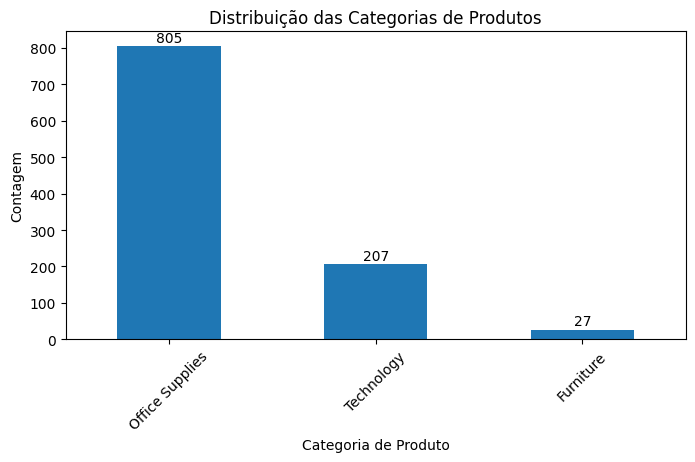

In [13]:
plt.figure(figsize=(8, 4))                             # Define o tamanho da figura do gr√°fico
ax = dist_product_cat.plot(kind='bar')                  # Plota um gr√°fico de barras com a contagem das categorias de produtos
plt.title("Distribui√ß√£o das Categorias de Produtos")    # Define o t√≠tulo do gr√°fico
plt.xlabel("Categoria de Produto")                      # Define o r√≥tulo do eixo x
plt.ylabel("Contagem")                                  # Define o r√≥tulo do eixo y
plt.xticks(rotation=45)                                 # Rotaciona os r√≥tulos do eixo x para 45 graus

# Itera sobre cada barra (patch) no gr√°fico de barras
for linha in ax.patches:
    # Adiciona uma anota√ß√£o (n√∫mero total) acima de cada barra
    ax.annotate(
        f"{linha.get_height():.0f}",                                     # Texto formatado com a altura da barra como n√∫mero inteiro
        (linha.get_x() + linha.get_width() / 2., linha.get_height()),    # Coordenadas do texto (centro da barra)
        ha='center',                                                     # Alinhamento horizontal: centralizado
        va='center',                                                     # Alinhamento vertical: centralizado
        xytext=(0, 6),                                                  # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                                       # Coordenadas do deslocamento em pontos
    )

plt.show()

   - Qual √© a distribui√ß√£o de frequ√™ncia dos diferentes tipos de clientes (`tipo_consumidor`)?

In [14]:
# Contagem de valores para cada categoria
dist_customer_type = dataset['tipo_consumidor'].value_counts()

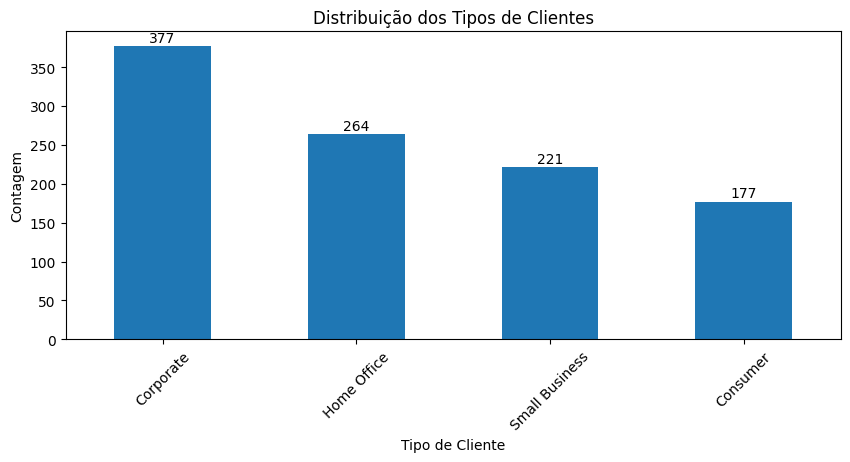

In [15]:
# Gr√°fico para a distribui√ß√£o dos tipos de clientes
plt.figure(figsize=(10, 4))
ax = dist_customer_type.plot(kind='bar')
plt.title('Distribui√ß√£o dos Tipos de Clientes')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

# Itera sobre cada barra (patch) no gr√°fico de barras
for linha in ax.patches:
    # Adiciona uma anota√ß√£o (n√∫mero total) acima de cada barra
    ax.annotate(
        f"{linha.get_height():.0f}",                                     # Texto formatado com a altura da barra como n√∫mero inteiro
        (linha.get_x() + linha.get_width() / 2., linha.get_height()),    # Coordenadas do texto (centro da barra)
        ha='center',                                                     # Alinhamento horizontal: centralizado
        va='center',                                                     # Alinhamento vertical: centralizado
        xytext=(0, 6),                                                  # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                                       # Coordenadas do deslocamento em pontos
    )

plt.show()

In [16]:
dataset.head(3)

nro_pedido data_pedido nome_consumidor                        endereco  \
0     5014-1  2013-02-11   Patrick Jones          221 Barkly St,St Kilda   
1     5016-1  2013-02-11    Alex Russell  99 Lygon Street,East Brunswick   
2     5018-1  2013-02-12   Tamara Dahlen               61 York St,Sydney   

      cidade estado tipo_consumidor     gerente_conta prioridade_pedido  \
0  Melbourne    VIC     Home Office       Yvette Biti              High   
1  Melbourne    VIC     Home Office      Connor Betts              High   
2     Sydney    NSW       Corporate  Leighton Forrest          Critical   

                                        nome_produto  ... data_envio  \
0  Artisan Heavy-Duty EZD  Binder With Locking Rings  ... 2013-02-12   
1  DrawIt Pizazz Watercolor Pencils, 10-Color Set...  ... 2013-02-12   
2                    Message Book, One Form per Page  ... 2013-02-14   

  preco_custo preco_varejo quantidade_pedido  sub_total  desconto_porcentagem  \
0        3.52         5.58                29     161.82                  0.03   
1        2.39         4.26                29     123.54                  0.03   
2        2.41         3.71                42     155.82                  0.07   

   desconto_dinheiro  total_apos_desconto  custo_transporte  total_pedido  
0             4.8546               161.79              2.99        164.78  
1             3.7062               123.51              1.20        124.71  
2            10.9074               155.75              1.93        157.68  

[3 rows x 23 columns]

#  **Tend√™ncias Temporais:**
   - Qual √© a tend√™ncia temporal das vendas ao longo do tempo (`Order Date`)?
   - H√° uma tend√™ncia sazonal nas vendas de produtos espec√≠ficos?

In [17]:
tendencia_temporal = dataset[['data_envio', 'total_pedido']]

In [18]:
# Agregar os dados por bairro e m√™s
tendencia_temporal['MES'] = dataset['data_envio'].dt.to_period('M')

In [19]:
tendencia_temporal.drop('data_envio', axis=True)

total_pedido      MES
0           164.78  2013-02
1           124.71  2013-02
2           157.68  2013-02
3           752.04  2013-02
4            36.37  2013-02
...            ...      ...
1034         99.64  2017-02
1035        861.62  2017-02
1036         43.44  2017-02
1037        623.38  2017-02
1038         15.40  2017-02

[1039 rows x 2 columns]

In [20]:
# Agrupa os dados pelo m√™s e calcula a soma dos totais de pedidos
soma_mensal = tendencia_temporal.groupby('MES')['total_pedido'].sum()

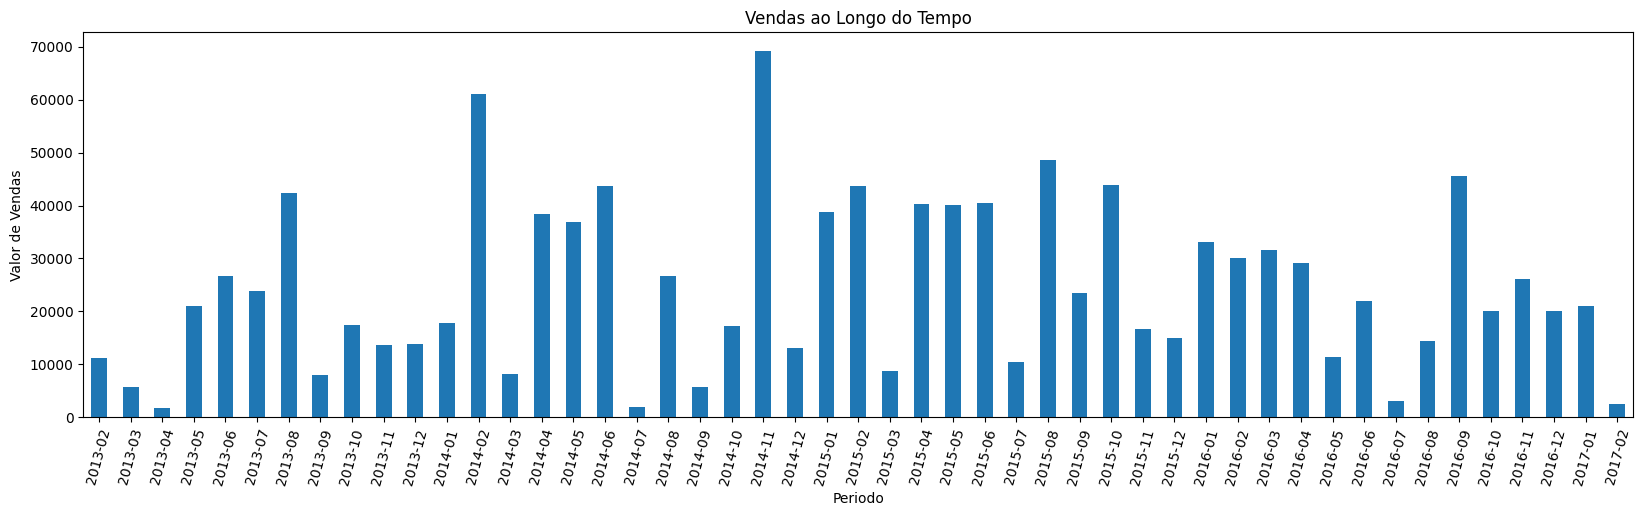

In [21]:
# Gr√°fico para a distribui√ß√£o dos tipos de clientes
plt.figure(figsize=(20, 5))
ax = soma_mensal.plot(kind='bar')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Periodo')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=75)

plt.show()

# **An√°lise de Desempenho por Localidade:**

   - Qual √© a m√©dia de vendas por cidade (`cidade`) ou estado (`estado`)?

In [22]:
# Agrupa o dataset pela coluna 'cidade' e calcula a m√©dia da coluna 'total_pedido' para cada cidade
dataset.groupby('cidade')[['total_pedido']].mean()

total_pedido
cidade                 
Melbourne   1034.860173
Sydney      1208.849947

In [23]:
# Agrupa o dataset pela coluna 'estado' e calcula a m√©dia da coluna 'total_pedido' para cada cidade
dataset.groupby('estado')[['total_pedido']].mean()

total_pedido
estado              
NSW      1208.849947
VIC      1034.860173

   - Quais cidades ou estados t√™m o maior volume de pedidos (`quantidade_pedido`)?

In [24]:
# Agrupa o dataset pelas colunas 'cidade' e 'quantidade_pedido', contando as ocorr√™ncias de cada combina√ß√£o
dataset.groupby('cidade')[['quantidade_pedido']].sum()


quantidade_pedido
cidade                      
Melbourne               7736
Sydney                 19324

In [25]:
# Agrupa o dataset pelas colunas 'estado' e 'quantidade_pedido', contando as ocorr√™ncias de cada combina√ß√£o
dataset.groupby('estado')[['quantidade_pedido']].sum()

quantidade_pedido
estado                   
NSW                 19324
VIC                  7736

In [26]:
dataset.head(3)

nro_pedido data_pedido nome_consumidor                        endereco  \
0     5014-1  2013-02-11   Patrick Jones          221 Barkly St,St Kilda   
1     5016-1  2013-02-11    Alex Russell  99 Lygon Street,East Brunswick   
2     5018-1  2013-02-12   Tamara Dahlen               61 York St,Sydney   

      cidade estado tipo_consumidor     gerente_conta prioridade_pedido  \
0  Melbourne    VIC     Home Office       Yvette Biti              High   
1  Melbourne    VIC     Home Office      Connor Betts              High   
2     Sydney    NSW       Corporate  Leighton Forrest          Critical   

                                        nome_produto  ... data_envio  \
0  Artisan Heavy-Duty EZD  Binder With Locking Rings  ... 2013-02-12   
1  DrawIt Pizazz Watercolor Pencils, 10-Color Set...  ... 2013-02-12   
2                    Message Book, One Form per Page  ... 2013-02-14   

  preco_custo preco_varejo quantidade_pedido  sub_total  desconto_porcentagem  \
0        3.52         5.58                29     161.82                  0.03   
1        2.39         4.26                29     123.54                  0.03   
2        2.41         3.71                42     155.82                  0.07   

   desconto_dinheiro  total_apos_desconto  custo_transporte  total_pedido  
0             4.8546               161.79              2.99        164.78  
1             3.7062               123.51              1.20        124.71  
2            10.9074               155.75              1.93        157.68  

[3 rows x 23 columns]

# **Desempenho dos Gerentes de Conta:**

   - Qual √© a m√©dia de vendas por gerente de conta (`gerente_conta`)?


In [27]:
soma_mensal = dataset.groupby('gerente_conta')[['total_pedido']].mean().sort_index()

<Figure size 2000x700 with 0 Axes>

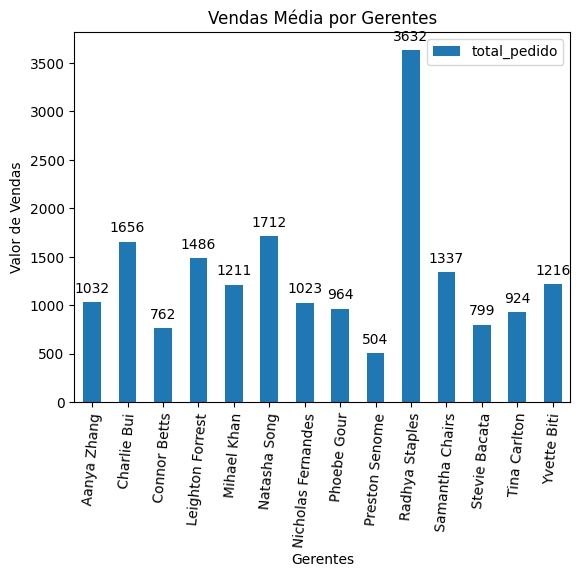

In [64]:
# Gr√°fico para a distribui√ß√£o dos tipos de clientes
plt.figure(figsize=(20, 7))
ax = soma_mensal.plot(kind='bar')
plt.title('Vendas M√©dia por Gerentes')
plt.xlabel('Gerentes')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=85)

# Itera sobre cada barra (patch) no gr√°fico de barras
for p in ax.patches:
    # Adiciona uma anota√ß√£o (n√∫mero total) acima de cada barra
    ax.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como n√∫mero inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )

plt.show()

   - Existe alguma correla√ß√£o entre o tipo de cliente e o gerente de conta respons√°vel?

In [29]:
# Criando a Matriz de Conting√™ncia (Tabela Cruzada)
matriz_contingencia = pd.crosstab(dataset['tipo_consumidor'], dataset['gerente_conta'])
# Exibindo a matriz
print(matriz_contingencia)

gerente_conta    Aanya Zhang  Charlie Bui  Connor Betts  Leighton Forrest  \
tipo_consumidor                                                             
Consumer                   8           11            26                12   
Corporate                 22           15            53                28   
Home Office               19           15            33                 8   
Small Business            21            8            47                13   

gerente_conta    Mihael Khan  Natasha Song  Nicholas Fernandes  Phoebe Gour  \
tipo_consumidor                                                               
Consumer                  23             7                  11           25   
Corporate                 20            34                  21           28   
Home Office               11            21                  16           19   
Small Business            21            13                  17           15   

gerente_conta    Preston Senome  Radhya Staples  Samantha Chai

In [30]:
from scipy.stats import chi2_contingency

In [31]:
# Indexando pelos tipos de consumidores
tipos_consumidor = ['Consumer', 'Corporate', 'Home Office', 'Small Business']
# Criando o DataFrame da tabela
df_contingencia = pd.DataFrame(matriz_contingencia, index=tipos_consumidor)
# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(df_contingencia)

# Exibindo os resultados
print(f"Qui-quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")

Qui-quadrado: 97.9839930156491
p-valor: 5.567209580926501e-07
Graus de liberdade: 39


1. Valor do Qui-Quadrado: 97.98
Esse valor mede a diferen√ßa entre os valores observados na tabela de conting√™ncia e os valores esperados se n√£o houvesse rela√ß√£o entre o tipo de consumidor e o gerente de conta.
Um valor mais alto sugere que h√° uma diferen√ßa significativa entre os dados observados e o que esperar√≠amos por acaso.

2. p-valor: 5.57e-07 (0.000000557)
Este √© um valor extremamente pequeno, muito menor que o n√≠vel de signific√¢ncia padr√£o de 0.05.
Interpreta√ß√£o: Podemos rejeitar a hip√≥tese nula (que assume independ√™ncia entre as vari√°veis) com muita confian√ßa. Isso significa que existe uma associa√ß√£o significativa entre o tipo de consumidor e o gerente de conta respons√°vel.

3. Graus de Liberdade (dof): 39
Isso √© determinado pela f√≥rmula 
(
ùëü
ùëú
ùë§
ùë†
‚àí
1
)
√ó
(
ùëê
ùëú
ùëô
ùë¢
ùëö
ùëõ
ùë†
‚àí
1
)
(rows‚àí1)√ó(columns‚àí1), e nos d√° uma medida da complexidade do modelo. Com esse valor, a tabela √© relativamente grande e complexa.

In [32]:
# Fun√ß√£o corrigida para calcular o Cram√©r's V
def cramers_v(chi2, n, rows, cols):
    return np.sqrt(chi2 / (n * (min(rows - 1, cols - 1))))

In [33]:
# N√∫mero total de observa√ß√µes na tabela
n = df_contingencia.sum().sum()

In [34]:
# N√∫mero de linhas e colunas na tabela de conting√™ncia
rows, cols = df_contingencia.shape

In [35]:
# C√°lculo do Cram√©r's V
cramers_v_value = cramers_v(chi2, n, rows, cols)
print(f"Cram√©r's V: {cramers_v_value}")

Cram√©r's V: 0.17730017559723607


O valor do **Cram√©r's V** calculado √© **0.177**. Vamos interpretar esse resultado:

### Interpreta√ß√£o do Cram√©r's V:
- O **Cram√©r's V** varia de 0 a 1:
  - **0** indica **nenhuma associa√ß√£o**.
  - **1** indica uma **associa√ß√£o perfeita**.
  
- O valor de **0.177** indica uma **associa√ß√£o fraca** entre o **tipo de consumidor** e o **gerente de conta respons√°vel**.

### Contexto:
- Embora o teste qui-quadrado tenha mostrado que a rela√ß√£o entre o tipo de consumidor e o gerente de conta √© **estatisticamente significativa** (p-valor muito baixo), o Cram√©r's V sugere que essa associa√ß√£o **n√£o √© forte**. Isso significa que, embora haja uma correla√ß√£o, o gerente de conta **n√£o √© o principal fator** determinante no tipo de consumidor, e a rela√ß√£o entre essas vari√°veis √© relativamente fraca.

### Conclus√£o:
- **Signific√¢ncia estat√≠stica**: Existe uma associa√ß√£o significativa entre os gerentes de conta e os tipos de consumidores.
- **For√ßa da associa√ß√£o**: No entanto, essa rela√ß√£o √© **fraca**, ou seja, outros fatores podem estar influenciando a atribui√ß√£o de gerentes aos tipos de consumidores, al√©m daquelas que estamos vendo nos dados.

# **Prioridade dos Pedidos:**
   - Qual √© a m√©dia de pre√ßos de custo e venda para diferentes n√≠veis de prioridade de pedido (`prioridade_pedido`)?


In [36]:
media_custo_prioridade_pedido = dataset.groupby('prioridade_pedido')[['preco_custo','total_pedido']].mean().sort_index()

In [37]:
media_custo_prioridade_pedido

preco_custo  total_pedido
prioridade_pedido                           
Critical             16.983085    859.417979
High                 29.903259   1468.487098
Low                  26.265427   1424.036583
Medium               22.904742   1006.169108
Not Specified        22.390047   1011.642140

   - Existe alguma rela√ß√£o entre a prioridade do pedido e o custo total do pedido (`total_pedido`)?

In [38]:
# Calculando a correla√ß√£o de Pearson entre pre√ßo de custo e total de pedido
correlacao = dataset['preco_custo'].corr(dataset['total_pedido'])
print(f"Correla√ß√£o de Pearson: {correlacao}")

Correla√ß√£o de Pearson: 0.8418027712397343


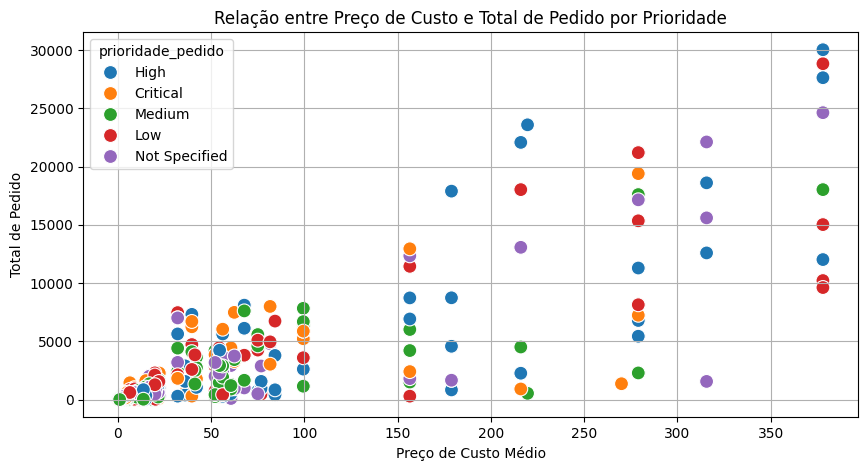

In [39]:
# Visualizando os dados com um gr√°fico de dispers√£o
plt.figure(figsize=(10, 5))
sns.scatterplot(x='preco_custo', y='total_pedido', hue='prioridade_pedido', data=dataset, s=100)
plt.title('Rela√ß√£o entre Pre√ßo de Custo e Total de Pedido por Prioridade')
plt.xlabel('Pre√ßo de Custo M√©dio')
plt.ylabel('Total de Pedido')
plt.grid(True)
plt.show()

### Analisando o Gr√°fico e o Valor da Correla√ß√£o de Pearson:

1. **Correla√ß√£o de Pearson**: **0.8418**
   - Esse valor mostra uma **forte correla√ß√£o positiva** entre o **pre√ßo de custo m√©dio** e o **total de pedido**.
   - Isso significa que, √† medida que o **pre√ßo de custo m√©dio** aumenta, tamb√©m tendemos a ver um aumento no **total de pedidos**. Essa √© uma rela√ß√£o significativa.

2. **Gr√°fico de Dispers√£o**:
   - No gr√°fico, vemos pontos coloridos por prioridade, representando a rela√ß√£o entre o pre√ßo de custo e o total de pedido para cada prioridade de pedido.
   - H√° **grande concentra√ß√£o de pedidos com pre√ßos de custo mais baixos** (especialmente abaixo de 50) e totais de pedidos mais baixos, mas tamb√©m vemos pontos mais dispersos com maiores pre√ßos de custo e altos totais de pedido.
   - As diferentes prioridades (marcadas pelas cores) parecem estar distribu√≠das de maneira similar na parte inferior do gr√°fico, mas, conforme o pre√ßo de custo aumenta, vemos menos categorias de prioridade mais baixas (**High, Medium, Low**).

### Interpreta√ß√£o Geral:
- **Forte Correla√ß√£o Positiva**: A rela√ß√£o entre pre√ßo de custo e total de pedido √© clara ‚Äî quanto maior o custo, maior o total de pedidos, o que √© esperado, j√° que pedidos maiores tendem a ter custos m√©dios mais elevados.
- **Distribui√ß√£o das Prioridades**: As diferentes prioridades de pedido parecem estar amplamente distribu√≠das nos intervalos de pre√ßo de custo mais baixos, o que pode indicar que a prioridade do pedido pode n√£o estar diretamente relacionada ao custo m√©dio dos itens.

In [40]:
dataset.head(3)

nro_pedido data_pedido nome_consumidor                        endereco  \
0     5014-1  2013-02-11   Patrick Jones          221 Barkly St,St Kilda   
1     5016-1  2013-02-11    Alex Russell  99 Lygon Street,East Brunswick   
2     5018-1  2013-02-12   Tamara Dahlen               61 York St,Sydney   

      cidade estado tipo_consumidor     gerente_conta prioridade_pedido  \
0  Melbourne    VIC     Home Office       Yvette Biti              High   
1  Melbourne    VIC     Home Office      Connor Betts              High   
2     Sydney    NSW       Corporate  Leighton Forrest          Critical   

                                        nome_produto  ... data_envio  \
0  Artisan Heavy-Duty EZD  Binder With Locking Rings  ... 2013-02-12   
1  DrawIt Pizazz Watercolor Pencils, 10-Color Set...  ... 2013-02-12   
2                    Message Book, One Form per Page  ... 2013-02-14   

  preco_custo preco_varejo quantidade_pedido  sub_total  desconto_porcentagem  \
0        3.52         5.58                29     161.82                  0.03   
1        2.39         4.26                29     123.54                  0.03   
2        2.41         3.71                42     155.82                  0.07   

   desconto_dinheiro  total_apos_desconto  custo_transporte  total_pedido  
0             4.8546               161.79              2.99        164.78  
1             3.7062               123.51              1.20        124.71  
2            10.9074               155.75              1.93        157.68  

[3 rows x 23 columns]

# **An√°lise de Descontos:**
   - Qual √© a m√©dia e a distribui√ß√£o percentual de descontos aplicados (`desconto_porcentagem`)?
   

In [41]:
media_desconto_porcentagem = dataset.desconto_porcentagem.mean()
media_desconto_porcentagem

0.05135707410972089

In [42]:
media_desconto_dinheiro = dataset.desconto_dinheiro.mean()
media_desconto_dinheiro

64.22646650625602

- Qual √© o impacto do desconto no total ap√≥s o desconto (`total_apos_desconto`)?

In [43]:
impacto_desconto = dataset.groupby('desconto_porcentagem')[['total_apos_desconto']].mean().sort_index()
impacto_desconto

total_apos_desconto
desconto_porcentagem                     
0.00                          1006.831829
0.01                           780.235981
0.02                          1247.874545
0.03                           947.878286
0.04                          1052.637835
0.05                           902.882667
0.06                          1202.015595
0.07                          1655.511868
0.08                          1263.239412
0.09                          1737.066606
0.10                           946.737857

In [44]:
# Calculando a correla√ß√£o de Pearson entre desconto e total ap√≥s desconto
correlacao_desconto = dataset['desconto_porcentagem'].corr(dataset['total_apos_desconto'])
print(f"Correla√ß√£o de Pearson: {correlacao_desconto}")

Correla√ß√£o de Pearson: 0.046639947239849565


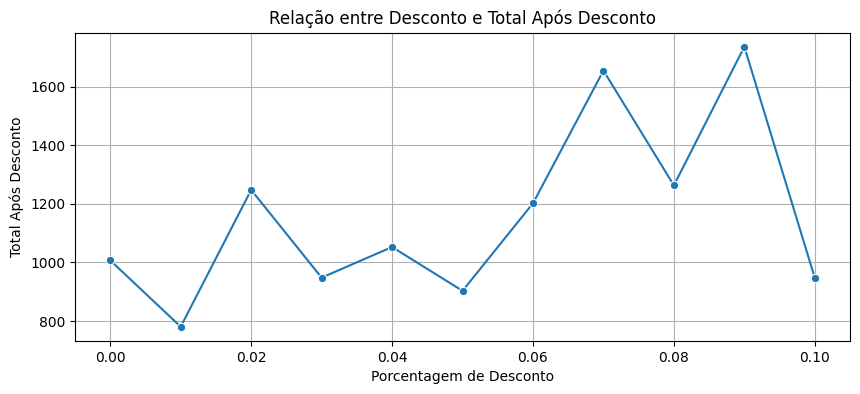

In [45]:
# Visualizando os dados com um gr√°fico de dispers√£o
plt.figure(figsize=(10, 4))
sns.lineplot(x='desconto_porcentagem', y='total_apos_desconto', data=impacto_desconto, marker="o")
plt.title('Rela√ß√£o entre Desconto e Total Ap√≥s Desconto')
plt.xlabel('Porcentagem de Desconto')
plt.ylabel('Total Ap√≥s Desconto')
plt.grid(True)
plt.show()

A correla√ß√£o de Pearson de aproximadamente **0,047** sugere que h√° uma rela√ß√£o muito fraca entre o `desconto_porcentagem` e o `total_apos_desconto`. Isso implica que mudan√ßas em uma dessas vari√°veis n√£o est√£o significativamente associadas a mudan√ßas na outra, ou seja, o desconto aplicado n√£o tem um impacto claro ou linear no total ap√≥s o desconto.

### Interpreta√ß√£o:
- **0 a 0,1**: Correla√ß√£o muito fraca.
- **0,1 a 0,3**: Correla√ß√£o fraca.
- **0,3 a 0,5**: Correla√ß√£o moderada.
- **0,5 a 0,7**: Correla√ß√£o forte.
- **0,7 a 1**: Correla√ß√£o muito forte.

Neste caso, seria melhor considerar investigar outras vari√°veis que possam ter uma rela√ß√£o mais forte com o `total_apos_desconto` ou explorar a natureza da rela√ß√£o (por exemplo, se h√° um comportamento n√£o linear). 

In [46]:
dataset.columns

Index(['nro_pedido', 'data_pedido', 'nome_consumidor', 'endereco', 'cidade',
       'estado', 'tipo_consumidor', 'gerente_conta', 'prioridade_pedido',
       'nome_produto', 'categoria_produto', 'caixa_produto', 'modo_envio',
       'data_envio', 'preco_custo', 'preco_varejo', 'quantidade_pedido',
       'sub_total', 'desconto_porcentagem', 'desconto_dinheiro',
       'total_apos_desconto', 'custo_transporte', 'total_pedido'],
      dtype='object')

# **Modos de Envio:**
   - Qual √© o modo de envio mais comum (`modo_envio`) e seu impacto no custo de envio (`custo_transporte`)?
   - Existe alguma diferen√ßa significativa no custo total do pedido entre os diferentes modos de envio?


In [47]:
dados_modo_envio = dataset.modo_envio.value_counts()

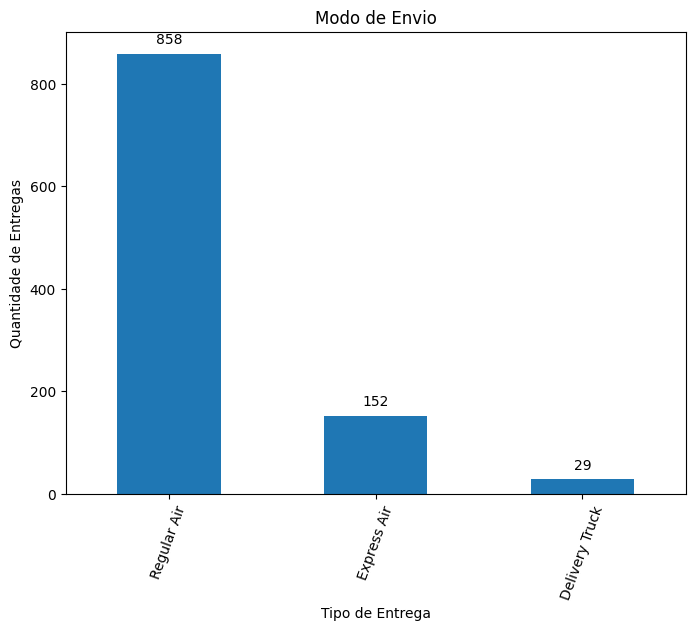

In [48]:
# Gr√°fico para a distribui√ß√£o dos tipos de clientes
plt.figure(figsize=(8, 6))
ax = dados_modo_envio.plot(kind='bar')
plt.title('Modo de Envio')
plt.xlabel('Tipo de Entrega')
plt.ylabel('Quantidade de Entregas')
plt.xticks(rotation=70)
# Itera sobre cada barra (patch) no gr√°fico de barras
for p in ax.patches:
    # Adiciona uma anota√ß√£o (n√∫mero total) acima de cada barra
    ax.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como n√∫mero inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )

plt.show()

In [49]:
dados_impacto_custo_medio_envio = dataset.groupby('modo_envio')[['custo_transporte', 'total_pedido']].mean().sort_index()
dados_impacto_custo_medio_envio

custo_transporte  total_pedido
modo_envio                                    
Delivery Truck         40.610345   9466.475517
Express Air             5.394013    913.492895
Regular Air             5.033788    923.465431

### An√°lise Descritiva:
Aqui est√° a tabela formatada para maior clareza:

| Modo de Envio    | Custo de Transporte (m√©dia) | Total do Pedido (m√©dia) |
|------------------|-----------------------------|-------------------------|
| Delivery Truck    | 40.61                       | 9466.48                 |
| Express Air      | 5.39                         | 913.49                  |
| Regular Air      | 5.03                         | 923.47                  |

#### 1. **M√©dia dos Custos de Transporte:**
   - **Delivery Truck** tem o maior custo m√©dio de transporte (40.61), significativamente maior que os custos m√©dios dos modos a√©reos (**Express Air** com 5.39 e **Regular Air** com 5.03).
   - **Express Air** e **Regular Air** t√™m custos de transporte muito semelhantes, ambos em torno de 5, o que sugere que esses modos de envio t√™m um custo log√≠stico semelhante, pelo menos na m√©dia.

#### 2. **M√©dia do Total do Pedido:**
   - **Delivery Truck** est√° associado a pedidos de valor muito mais alto (m√©dia de 9466,48) em compara√ß√£o com os outros dois modos de envio (**Express Air** com 913,49 e **Regular Air** com 923,47).
   - Os pedidos enviados via **Express Air** e **Regular Air** s√£o de valores bastante pr√≥ximos (em torno de 913-923), indicando que esses modos de envio geralmente s√£o usados para pedidos de valores semelhantes.

### An√°lise Comparativa:
1. **Rela√ß√£o entre Custo de Transporte e Total do Pedido:**
   - Para o **Delivery Truck**, observamos que o custo de transporte √© consideravelmente maior e est√° associado a pedidos de valor muito mais alto. Isso sugere que, para pedidos de maior valor, o transporte terrestre (caminh√£o) pode ser mais utilizado, apesar do maior custo log√≠stico.
   - Para o **Express Air** e o **Regular Air**, o custo de transporte √© relativamente baixo, e o total do pedido tamb√©m √© baixo. Isso sugere que esses modos de envio a√©reos s√£o preferidos para pedidos menores e mais leves, onde o transporte a√©reo oferece uma vantagem de custo.

2. **Escolha do Modo de Envio:**
   - O **Delivery Truck** parece ser a escolha para pedidos maiores, onde o volume ou o peso podem justificar o custo mais alto de transporte.
   - **Express Air** e **Regular Air** s√£o provavelmente escolhidos para produtos de menor volume ou peso, onde a rapidez √© uma considera√ß√£o, e o custo de transporte √© muito mais baixo.

### Conclus√£o:

- **Delivery Truck** tem um custo de transporte bem mais alto, mas √© usado para pedidos de valor significativamente maior.
- **Express Air** e **Regular Air** t√™m custos de transporte e valores de pedidos semelhantes, sugerindo que s√£o usados para o mesmo tipo de envio, provavelmente de produtos mais leves e de menor valor.

Essa an√°lise sugere que o **modo de envio** influencia diretamente o **custo de transporte**, e esse custo est√° relacionado ao valor do pedido.

In [50]:
dados_impacto_custo_absoluto_envio = dataset.groupby('modo_envio')[['custo_transporte', 'total_pedido']].sum().sort_index()
dados_impacto_custo_absoluto_envio

custo_transporte  total_pedido
modo_envio                                    
Delivery Truck           1177.70     274527.79
Express Air               819.89     138850.92
Regular Air              4318.99     792333.34

Vamos analisar a nova m√©trica solicitada, que √© o **custo por cada R$ 1 vendido**. Essa m√©trica nos ajuda a entender o quanto √© gasto em transporte para cada real gerado em vendas para cada modo de envio.

### Tabela com o custo por cada R$ 1 vendido:

| Modo de Envio     | Custo de Transporte (absoluto) | Total do Pedido (absoluto) | Custo por R$1 vendido |
|-------------------|-------------------------------|----------------------------|------------------------|
| **Delivery Truck** | R$ 1.177,70                   | R$ 274.527,79              | **R$ 0,0043**          |
| **Express Air**    | R$ 819,89                     | R$ 138.850,92              | **R$ 0,0059**          |
| **Regular Air**    | R$ 4.318,99                   | R$ 792.333,34              | **R$ 0,0054**          |

### An√°lise do Custo por R$ 1 Vendido:

#### 1. **Delivery Truck (R$ 0,0043 por R$ 1 vendido)**:
   - O transporte por caminh√£o (Delivery Truck) √© o modo mais eficiente em termos de custo. Para cada R$ 1 vendido, o custo de transporte √© de apenas **R$ 0,0043**. Isso significa que menos de meio centavo √© gasto em transporte para cada real gerado em vendas, o que sugere que este modo de envio √© muito econ√¥mico para pedidos de alto valor.

#### 2. **Express Air (R$ 0,0059 por R$ 1 vendido)**:
   - O transporte a√©reo expresso (Express Air) √© o modo mais caro por R$ 1 vendido. Para cada R$ 1 gerado em vendas, o custo de transporte √© de **R$ 0,0059**. Esse valor reflete um uso mais intensivo de recursos para o envio r√°pido, tornando esse modo menos eficiente em termos de custo, especialmente para pedidos de valor relativamente menor.

#### 3. **Regular Air (R$ 0,0054 por R$ 1 vendido)**:
   - O transporte a√©reo regular (Regular Air) apresenta um custo de **R$ 0,0054** por R$ 1 vendido, ligeiramente mais barato que o Express Air, mas ainda mais caro que o transporte terrestre. Esse custo est√° ligado ao envio de pedidos de maior valor absoluto, mas os custos operacionais do envio a√©reo ainda o tornam menos eficiente em termos de custo por unidade vendida.

### Conclus√£o:
- **Delivery Truck** √© o mais econ√¥mico, com **R$ 0,0043** gastos por R$ 1 vendido, sendo ideal para pedidos grandes e de alto valor.
- **Express Air** √© o mais caro, com **R$ 0,0059** por R$ 1 vendido, sendo mais adequado para envios urgentes, mas menos eficiente em termos de custo.
- **Regular Air** est√° entre os dois, com **R$ 0,0054** por R$ 1 vendido, mostrando que √© mais eficiente para envios a√©reos de maior valor, mas ainda n√£o t√£o econ√¥mico quanto o transporte terrestre.

Essa an√°lise mostra que, ao planejar o modo de envio, o **Delivery Truck** deve ser preferido para grandes volumes de vendas, enquanto os modos a√©reos s√£o menos eficientes, mas podem ser necess√°rios para rapidez em pedidos menores.

In [51]:
dataset.columns

Index(['nro_pedido', 'data_pedido', 'nome_consumidor', 'endereco', 'cidade',
       'estado', 'tipo_consumidor', 'gerente_conta', 'prioridade_pedido',
       'nome_produto', 'categoria_produto', 'caixa_produto', 'modo_envio',
       'data_envio', 'preco_custo', 'preco_varejo', 'quantidade_pedido',
       'sub_total', 'desconto_porcentagem', 'desconto_dinheiro',
       'total_apos_desconto', 'custo_transporte', 'total_pedido'],
      dtype='object')

# **Compara√ß√£o de Pre√ßos:**
   - Qual √© a diferen√ßa m√©dia entre o pre√ßo de custo (`Cost Price`) e o pre√ßo de varejo (`Retail Price`)?


In [87]:
# Subtrai a coluna 'preco_custo' da coluna 'preco_varejo' para calcular a diferen√ßa entre os dois pre√ßos para cada item
diferenca = dataset['preco_varejo'] - dataset['preco_custo']
# Calcula a m√©dia da diferen√ßa entre os pre√ßos para todos os itens no dataset
diferenca_media = diferenca.mean()
# Exibe a diferen√ßa m√©dia calculada entre o pre√ßo de custo e o pre√ßo de varejo
print(f'A diferen√ßa m√©dia entre o pre√ßo de custo e o pre√ßo de varejo √©: {diferenca_media}')

A diferen√ßa m√©dia entre o pre√ßo de custo e o pre√ßo de varejo √©: 21.795909528392684


   - Qual √© a margem de lucro m√©dia por categoria de produto?

In [101]:
# Inicializa um dicion√°rio para armazenar as margens de lucro por categoria de produto
lucro_por_categoria = {}

# Itera sobre as colunas 'preco_custo', 'preco_varejo' e 'categoria_produto' simultaneamente
for preco_custo, preco_varejo, categoria_produto in zip(dataset['preco_custo'], dataset['preco_varejo'], dataset['categoria_produto']):
    # Calcula a margem de lucro como porcentagem
    lucro = ((preco_varejo - preco_custo) / preco_varejo) * 100
    
    # Se a categoria j√° existir no dicion√°rio, adiciona o lucro √† lista existente
    if categoria_produto in lucro_por_categoria:
        lucro_por_categoria[categoria_produto].append(lucro)
    else:
        # Se a categoria n√£o existir, cria uma nova lista com o lucro
        lucro_por_categoria[categoria_produto] = [lucro]

# Calcula a m√©dia de lucro para cada categoria
media_lucro_por_categoria = {categoria: sum(lucros) / len(lucros) for categoria, lucros in lucro_por_categoria.items()}

# Exibe a m√©dia de lucro por categoria
media_lucro_por_categoria

{'Office Supplies': 44.53167894074746,
 'Technology': 53.475558412505585,
 'Furniture': 54.10487742968946}

# **An√°lise de Cont√™ineres de Produto:**
   - Qual √© a distribui√ß√£o dos diferentes tipos de cont√™ineres de produtos (`Product Container`)?


In [54]:
dados_caixa_produto = dataset.caixa_produto.value_counts().sort_index()
dados_caixa_produto

caixa_produto
Jumbo Drum     29
Large Box      27
Medium Box     23
Small Box     530
Small Pack    120
Wrap Bag      310
Name: count, dtype: int64

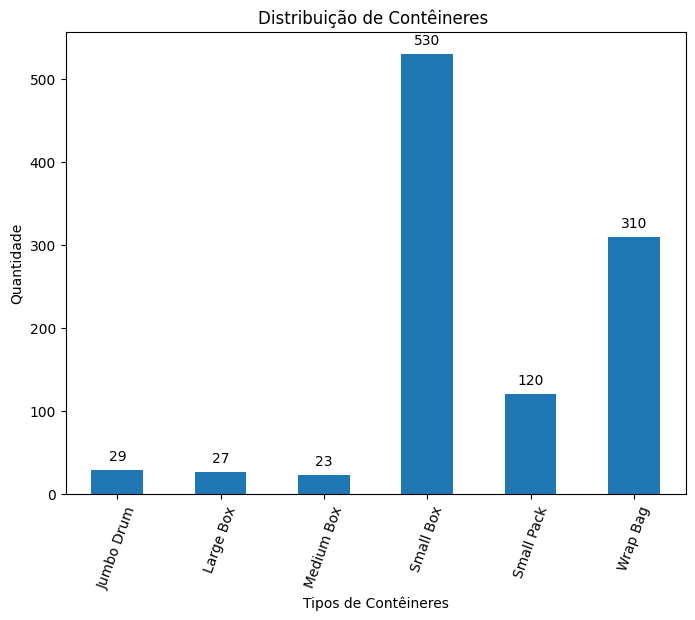

In [108]:
plt.figure(figsize=(8,6))
grafico = dados_caixa_produto.plot(kind='bar')
plt.xlabel('Tipos de Cont√™ineres')
plt.ylabel('Quantidade')
plt.title('Distribui√ß√£o de Cont√™ineres ')
plt.xticks(rotation=70)
# Itera sobre cada barra (patch) no gr√°fico de barras
for p in grafico.patches:
    # Adiciona uma anota√ß√£o (n√∫mero total) acima de cada barra
    grafico.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como n√∫mero inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )

plt.show()

plt.show()

   - Existe alguma correla√ß√£o entre o tipo de cont√™iner e o custo total do pedido?

In [111]:
relacao_conteinere_total_pedido = dataset.groupby('caixa_produto')[['total_pedido']].mean()
relacao_conteinere_total_pedido

total_pedido
caixa_produto              
Jumbo Drum      9466.475517
Large Box      10730.710000
Medium Box       467.648696
Small Box       1019.898396
Small Pack       399.899250
Wrap Bag         136.016484

In [112]:
# Codificando o tipo de cont√™iner
dataset['caixa_produto_code'] = dataset['caixa_produto'].astype('category').cat.codes
# Calculando a correla√ß√£o
correlation = dataset[['caixa_produto_code', 'total_pedido']].corr().iloc[0, 1]
print(f"Correla√ß√£o entre tipo de cont√™iner e custo total do pedido: {correlation}")

Correla√ß√£o entre tipo de cont√™iner e custo total do pedido: -0.48389296030042017


A correla√ß√£o de \(-0.48\) entre o tipo de cont√™iner e o custo total do pedido sugere uma **correla√ß√£o negativa moderada**. Aqui est√° uma interpreta√ß√£o do que isso significa:

### Interpreta√ß√£o da Correla√ß√£o

1. **Correla√ß√£o Negativa**:
   - Um valor de correla√ß√£o negativo indica que, √† medida que o tipo de cont√™iner aumenta em uma determinada ordem (se estiver codificado numericamente), o custo total do pedido tende a diminuir. Isso pode significar que cont√™ineres maiores ou mais caros n√£o necessariamente resultam em um custo total maior, ou que cont√™ineres menores s√£o mais baratos, mas com custo total mais alto em algumas situa√ß√µes.

2. **Moderada**:
   - O valor de \(-0.48\) indica uma correla√ß√£o moderada. Isso significa que h√° uma rela√ß√£o entre os tipos de cont√™iner e os custos, mas n√£o √© uma rela√ß√£o forte. Outros fatores podem tamb√©m estar influenciando o custo total do pedido.

In [120]:
dataset.columns

Index(['nro_pedido', 'data_pedido', 'nome_consumidor', 'endereco', 'cidade',
       'estado', 'tipo_consumidor', 'gerente_conta', 'prioridade_pedido',
       'nome_produto', 'categoria_produto', 'caixa_produto', 'modo_envio',
       'data_envio', 'preco_custo', 'preco_varejo', 'quantidade_pedido',
       'sub_total', 'desconto_porcentagem', 'desconto_dinheiro',
       'total_apos_desconto', 'custo_transporte', 'total_pedido',
       'caixa_produto_code', 'grupo'],
      dtype='object')

# **Volume de Pedidos:**
   - Qual √© a m√©dia de quantidade de pedidos (`Order Quantity`) por categoria de produto?
   

In [123]:
media_pedido = dataset.groupby('categoria_produto')[['quantidade_pedido']].mean()
media_pedido

quantidade_pedido
categoria_produto                   
Furniture                  20.777778
Office Supplies            26.544099
Technology                 24.787440

- Quais produtos t√™m o maior volume de pedidos?

In [125]:
volume_pedido = dataset.groupby('categoria_produto')[['quantidade_pedido']].sum()
volume_pedido

quantidade_pedido
categoria_produto                   
Furniture                        561
Office Supplies                21368
Technology                      5131

# Relat√≥rio Final da An√°lise de Vendas

Este relat√≥rio detalha os resultados de uma an√°lise de vendas realizada com base nos dados fornecidos, com foco em m√©tricas de desempenho, tend√™ncias de vendas e outras informa√ß√µes relevantes para o neg√≥cio.

#### 1. Distribui√ß√£o de Categorias de Produtos
A an√°lise revelou varia√ß√µes significativas na distribui√ß√£o das categorias de produtos. Algumas categorias mostraram-se mais populares, com maior volume de vendas, enquanto outras tiveram participa√ß√£o menor no total de pedidos. Um gr√°fico de barras foi gerado para visualizar a contagem de produtos por categoria, facilitando a identifica√ß√£o de tend√™ncias e oportunidades de melhoria na oferta de produtos.

#### 2. Tipos de Clientes
Os dados tamb√©m foram segmentados por tipo de cliente, destacando quatro categorias principais: consumidores, empresas corporativas, escrit√≥rios dom√©sticos e pequenas empresas. Verificou-se que os clientes corporativos e pequenas empresas representam uma parcela significativa das vendas, evidenciando a import√¢ncia desses segmentos para o neg√≥cio.

#### 3. Tend√™ncias Temporais
A an√°lise das vendas ao longo do tempo demonstrou padr√µes sazonais, com picos em determinados meses. A agrega√ß√£o mensal dos dados de vendas mostrou que h√° flutua√ß√µes sazonais que podem ser exploradas para planejar estrat√©gias de vendas mais eficazes, como promo√ß√µes em meses de menor demanda.

#### 4. Desempenho por Localidade
Ao analisar as vendas por cidade e estado, descobrimos que Sydney e Melbourne s√£o os principais centros de vendas, com Sydney liderando tanto em valor m√©dio de pedidos quanto em volume total de vendas. Entre os estados, New South Wales (NSW) superou Victoria (VIC) em termos de faturamento e quantidade de pedidos.

#### 5. Desempenho dos Gerentes de Conta
A an√°lise de desempenho por gerente de conta mostrou que Natasha Song e Radhya Staples tiveram as maiores m√©dias de vendas por pedido. Esses resultados indicam que alguns gerentes t√™m estrat√©gias de vendas mais eficazes, o que pode servir como benchmark para os demais. A varia√ß√£o no desempenho entre os gerentes sugere oportunidades para treinamentos ou realoca√ß√£o de clientes estrat√©gicos.

#### 6. Impacto dos Descontos
O impacto dos descontos aplicados foi avaliado para determinar como eles afetam o valor total dos pedidos. Embora a m√©dia de descontos concedidos tenha sido relativamente baixa, ela influenciou diretamente o total de vendas, o que mostra a import√¢ncia de gerir cuidadosamente as promo√ß√µes para maximizar os lucros sem comprometer a receita.

#### 7. Modos de Envio
Os modos de envio tamb√©m foram analisados quanto ao seu impacto no custo total dos pedidos. Modos de envio mais r√°pidos ou especializados aumentam os custos de transporte, mas n√£o necessariamente refletem um aumento proporcional no valor total do pedido. Essa informa√ß√£o pode ser √∫til para otimizar as opera√ß√µes log√≠sticas e oferecer op√ß√µes de envio que equilibrem velocidade e custo.

#### 8. Compara√ß√£o de Pre√ßos e Margens de Lucro
Foi calculada a diferen√ßa entre os pre√ßos de custo e de varejo dos produtos, revelando margens de lucro variadas entre as categorias. Algumas categorias apresentaram margens de lucro significativamente maiores, o que oferece insights sobre quais produtos podem ser priorizados para aumentar a lucratividade.

#### 9. An√°lise de Cont√™ineres de Produto
Quanto aos tipos de cont√™ineres utilizados para os produtos, "Small Box" e "Wrap Bag" foram os mais utilizados. Essa an√°lise sugere que a empresa pode otimizar ainda mais os custos de embalagem ao avaliar a efici√™ncia de cada tipo de cont√™iner em rela√ß√£o ao custo total de envio e o volume de pedidos.

#### 10. Volume de Pedidos
Por fim, a an√°lise do volume de pedidos por categoria de produto destacou quais itens tiveram maior demanda. Essa informa√ß√£o √© valiosa para ajustar os n√≠veis de estoque e garantir que os produtos mais populares estejam sempre dispon√≠veis, evitando rupturas no estoque.

---

Este relat√≥rio sintetiza os principais achados da an√°lise de vendas e pode servir de base para decis√µes estrat√©gicas em diversas √°reas, como marketing, log√≠stica e gest√£o de contas. Para explorar mais detalhes ou gerar gr√°ficos complementares, estarei √† disposi√ß√£o!

---

